In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pricing par méthode de Monte-Carlo

## Méthode de simulation

On a l'expression du rendement de l'actif sous-jacent S :

$\frac{dS_t}{S_t}=(r-d)d t+\sigma d W_t$

où r, d, σ, W sont respectivement le taux sans risque, le taux de dividende, la volatilité et le mouvement brownien.

# Mouvement brownien

Définissons tout d'abord le mouvement brownien :

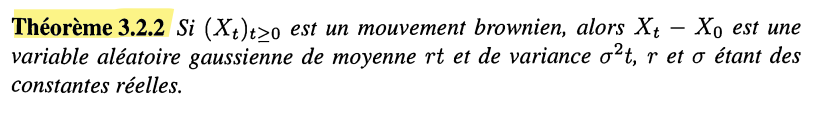

In [7]:
def mouvement_brownien(n, T, x0, r, sigma):
    t = np.linspace(0, T, n)
    dt = t[1] - t[0]
    B = np.zeros(n)
    B[0] = x0
    for i in range(1, n):
        B[i] = B[i-1] + np.random.normal(loc=r*dt, scale=sigma*np.sqrt(dt))
    return t, B

In [8]:
def mouvement_brownien_standard(n, T):
    return mouvement_brownien(n, T, 0, 0, 1)

In [17]:
t, W = mouvement_brownien_standard(10, 1)
print(t)
print(W)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 0.          0.14342657  0.5905193   0.52235195  0.55751213  0.34231389
  0.00287075 -0.28950858 -0.14426408 -0.44197452]


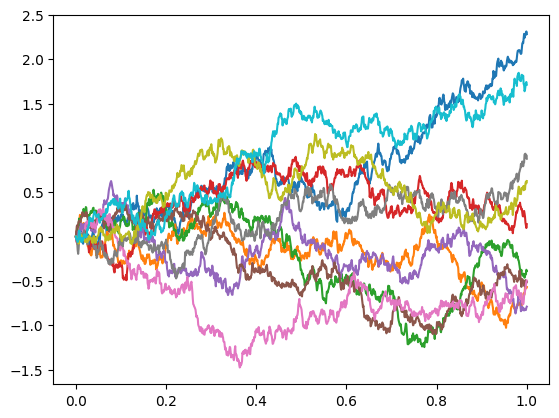

In [9]:
for j in range(10):
    temps, B = mouvement_brownien_standard(1000, 1)
    plt.plot(temps, B)

# Black-Scholes

On a la formule de Black-Scholes :

$dS_t = S_t(\mu dt + \sigma dB_t)$

où $\mu$ et $\sigma$ sont deux constantes et $(B_t)$ un mouvement brownien standard.

Soit 

$S_t = S_0 \exp (\mu t - \frac{\sigma^2}{2}t + \sigma B_t)$

Avec les notations de l'exercice on a :

$S_t = S_0 \exp ((r-d) t - \frac{\sigma^2}{2}t + \sigma W_t)$

In [25]:
def black_scholes(S0, n, T, r, d, sigma):
    temps, W = mouvement_brownien_standard(n, T)
    dt = temps[1] - temps[0]
    S = [S0]
    for t, Wt in zip(temps[1:], W[1:]):
        S.append(S0*np.exp((r-d)*t - sigma**2*t/2 + sigma*Wt))
    return temps, S, W

In [46]:
def plot_black_scholes(S0, n, T, r, d, sigma, nb_simu):
    fig, ax = plt.subplots(2)
    for _ in range(nb_simu):
        temps, prix, W = black_scholes(S0, n, T, r, d, sigma)
        ax[0].plot(temps, W)
        ax[0].set_title("Mouvement brownien")
        ax[0].label_outer()
        ax[1].plot(temps, prix)
        ax[1].set_title("Evolution du prix du sous-jacent")

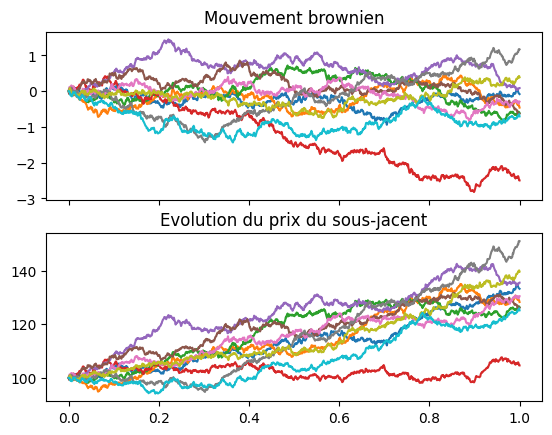

In [47]:
S0 = 100
n = 1000
T = 1
r = 0.5
d = 0.2
sigma = 0.1
plot_black_scholes(S0, n, T, r, d, sigma, 10)